In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap

In [14]:
#read file and get data
file_path = 'NY-House-Dataset.csv'
data = pd.read_csv(file_path)

In [15]:
#basic clean
required_columns = ['LONGITUDE', 'LATITUDE', 'PRICE', 'PROPERTYSQFT']
cleaned_data = data.dropna(subset=required_columns)

In [16]:
#Calculate price per square foot
cleaned_data['PRICE_PER_SQFT'] = cleaned_data['PRICE'] / cleaned_data['PROPERTYSQFT']

In [17]:
#Filtering out outliers
filtered_data = cleaned_data[cleaned_data['PRICE_PER_SQFT'] <= 28000]

In [18]:
# Create scatterplot: latitude and longitude vs. price per square foot
plt.figure(figsize=(12, 5))
#Set global font size and style
plt.rcParams.update({'font.size': 10})
sns.set_style("whitegrid", {'grid.linestyle': ':'})

<Figure size 1200x500 with 0 Axes>

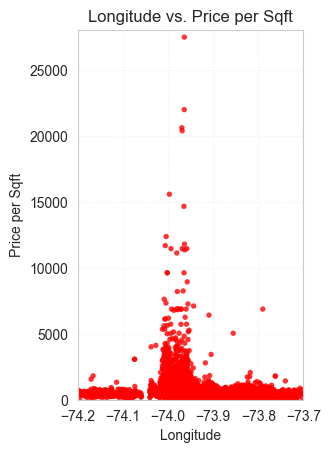

In [19]:
# Longitude vs price per square foot
plt.subplot(1, 2, 1)
plt.scatter(filtered_data['LONGITUDE'], filtered_data['PRICE_PER_SQFT'],
           color='red', alpha=0.8, s=15, edgecolor='none')
plt.title('Longitude vs. Price per Sqft', fontsize=12)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Price per Sqft', fontsize=10)
plt.yticks([0, 5000, 10000, 15000, 20000, 25000])
plt.xlim(-74.2, -73.7)  
plt.ylim(0, 28000)     
plt.grid(True, alpha=0.3)

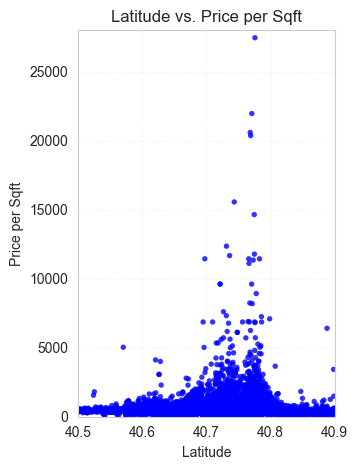

In [20]:
## Latitude vs Price per square foot
plt.subplot(1, 2, 2)
plt.scatter(filtered_data['LATITUDE'], filtered_data['PRICE_PER_SQFT'],
           color='blue', alpha=0.8, s=15, edgecolor='none')
plt.title('Latitude vs. Price per Sqft', fontsize=12)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Price per Sqft', fontsize=10)
plt.yticks([0, 5000, 10000, 15000, 20000, 25000])
plt.xlim(40.5, 40.9)  
plt.ylim(0, 28000)   
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
#Create 5 price ranges (bins)
plt.figure(figsize=(10, 6))
price_bins = [1.14, 292.55, 416.67, 583.66, 966.38, 27469.91]

<Figure size 1000x600 with 0 Axes>

In [22]:
#Creating map visualisations
# Calculate centre points
center_lat = filtered_data['LATITUDE'].mean()
center_lon = filtered_data['LONGITUDE'].mean()
ny_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)
for idx, row in filtered_data.iterrows():
    # Colour according to price (from green to blue, the higher the price the bluer the colour)
    price = row['PRICE_PER_SQFT']
    if price < 1000:
        color = 'green'
    elif price < 5000:
        color = 'lightblue'
    else:
        color = 'blue'
    
    #  Adding a Dot Marker
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Price: ${row['PRICE']:,.2f}, Price/sqft: ${row['PRICE_PER_SQFT']:.2f}"
    ).add_to(ny_map)
ny_map.save('ny_house_prices_map.html')


C:\Users\Admin\AppData\Local\Temp\ipykernel_5684\4262521289.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')


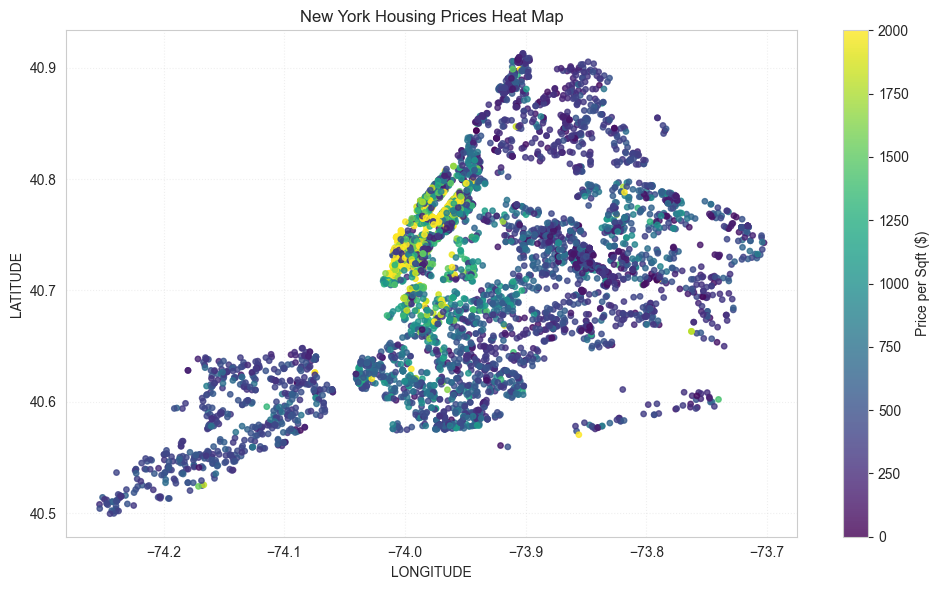

In [25]:
plt.figure(figsize=(10, 6))
# Setting up the colour mapping
cmap = plt.cm.get_cmap('viridis')
sc = plt.scatter(filtered_data['LONGITUDE'], filtered_data['LATITUDE'], 
            c=filtered_data['PRICE_PER_SQFT'], 
            cmap=cmap,
            vmin=0, vmax=2000,  # Set min and max values for color scale
            s=15, alpha=0.8)

plt.colorbar(sc, label='Price per Sqft ($)')
plt.title('New York Housing Prices Heat Map')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
def get_price_bin(price):
    bins = [0, 292.55, 416.67, 583.66, 966.38, float('inf')]
    labels = ['Bin 0', 'Bin 1', 'Bin 2', 'Bin 3', 'Bin 4']
    for i, upper in enumerate(bins[1:]):
        if price <= upper:
            return labels[i]
    return labels[-1]

filtered_data['price_bin'] = filtered_data['PRICE_PER_SQFT'].apply(get_price_bin)

# Calculate statistics for each interval
bin_stats = filtered_data.groupby('price_bin').agg({
    'PRICE': ['mean', 'median', 'count'],
    'PROPERTYSQFT': ['mean', 'median'],
    'PRICE_PER_SQFT': ['mean', 'median', 'min', 'max']
})

print("Price range statistics.")
print(bin_stats)

#  Display the range of values for each interval
print("\nPrice range:")
print(f"Bin 0: $1.14 - $292.55")
print(f"Bin 1: $292.55 - $416.67")
print(f"Bin 2: $416.67 - $583.66")
print(f"Bin 3: $583.66 - $966.38")
print(f"Bin 4: $966.38 - $27469.91")

Price range statistics.
                  PRICE                  PROPERTYSQFT               \
                   mean     median count         mean       median   
price_bin                                                            
Bin 0      4.572607e+05   350000.0   962  2442.631822  2184.207862   
Bin 1      7.327431e+05   699900.0   960  2052.816162  2184.207862   
Bin 2      1.018673e+06   918000.0   957  2059.483345  1875.000000   
Bin 3      1.336790e+06  1199999.0   959  1840.098440  1605.000000   
Bin 4      5.995859e+06  2995000.0   962  2515.890490  2184.207862   

          PRICE_PER_SQFT                                         
                    mean       median         min           max  
price_bin                                                        
Bin 0         190.450435   193.083471    1.141833    292.000000  
Bin 1         356.721417   358.778778  292.554574    416.666667  
Bin 2         491.728580   489.639175  416.857143    583.333333  
Bin 3         736.4

C:\Users\Admin\AppData\Local\Temp\ipykernel_5684\3456757002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['price_bin'] = filtered_data['PRICE_PER_SQFT'].apply(get_price_bin)
